In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
import cv2
%matplotlib inline  

In [2]:

img = cv2.imread("projectPics/actor.jpg",cv2.IMREAD_GRAYSCALE)
# sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
# sobely = np.absolute(sobely)
# sobely = np.uint8(sobely)

laplacian = cv2.Laplacian(img, cv2.CV_64F)

img = laplacian
imgLine = img


In [3]:
img.shape

(673, 565)

In [4]:
nrRows = img.shape[0]
nrCols = img.shape[1]

maxRowVal = -1
maxRowIndex = -1;

buffer = 5;

horizontalDict = {}

for rowIndex in range(buffer,nrRows-buffer):
    rowVal = sum(img[rowIndex,:])
    
#     if(rowVal > 15000):
#         horizontalDict[rowIndex] = 0
#         continue
    
    horizontalDict[rowIndex] = rowVal
    if rowVal > maxRowVal:
        maxRowVal = rowVal
        maxRowIndex = rowIndex

  


maxColVal = -1
maxColIndex = -1

verticalDict = {}
# for colIndex in range(buffer,int(nrCols/2)-buffer):
for colIndex in range(int(nrCols/2),nrCols-buffer):
    colVal = sum(img[:,colIndex])
    
    
#     if(colVal > 15000):
#         verticalDict[colIndex] = 0
#         continue
        
    verticalDict[colIndex] = colVal
    
    if colVal > maxColVal:
        maxColVal = colVal
        maxColIndex = colIndex
  

In [5]:
maxColIndex

295

In [6]:

def showLineImg():
    
    colorImg = cv2.imread("projectPics/actor.jpg",cv2.IMREAD_COLOR)
    
    cv2.line(colorImg, (0,maxRowIndex), (nrCols,maxRowIndex), (255,0,0))
#     cv2.line(imgLine, (0,maxColIndex), (nrCols,maxColIndex), (255,0,0))

#     cv2.line(imgLine, (minRowIndex,0), (maxRowIndex,nrCols), (255,0,0))
    cv2.line(colorImg, (maxColIndex,0), (maxColIndex,nrCols), (255,0,0))


    cv2.imshow('sobely',colorImg)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def showImg():

    cv2.imshow('sobely',img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

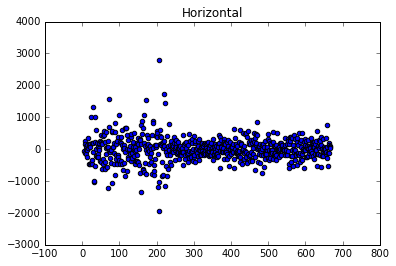

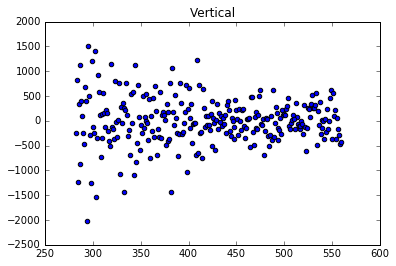

In [7]:
horX = list(horizontalDict.keys())
horY = list(horizontalDict.values())

plt.scatter(horX,horY)
plt.title("Horizontal")
plt.show()

vertX = list(verticalDict.keys())
vertY = list(verticalDict.values())

plt.scatter(vertX,vertY)
plt.title("Vertical")
plt.show()

In [12]:
showLineImg()


In [13]:
showImg()
